<a href="https://colab.research.google.com/github/duckieeloaded/apartmentforrent/blob/main/DuDoanMacBenhTieuDuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [309]:
#Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [310]:
#Đọc dữ liệu
url = "https://raw.githubusercontent.com/thangnch/MIAI_DecisionTree/refs/heads/main/data.csv"
df = pd.read_csv(url)
print("Dữ liệu:")
#Xem 5 dòng đầu
df.head()

Dữ liệu:


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [311]:
#Xem 5 dòng cuối
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [312]:
print('Số lượng mẫu của bộ dữ liệu là:', df.shape[0])
print('Số lượng thuộc tính của bộ dữ liệu là:', df.shape[1])

Số lượng mẫu của bộ dữ liệu là: 116
Số lượng thuộc tính của bộ dữ liệu là: 10


In [313]:
t = df.keys()[-1]
print('Mục tiêu là   ➡ ', t)
attribute_names = list(df.keys())
attribute_names.remove(t)
print('Dự đoán các thuộc tính ➡ ', attribute_names)

Mục tiêu là   ➡  Classification
Dự đoán các thuộc tính ➡  ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']


In [314]:

import math
def entropy(probs):
    # Tính entropy từ một list xác suất
    return sum([-prob * math.log(prob, 2) for prob in probs if prob > 0])

def entropy_of_list(ls,value):
    from collections import Counter

    # Xác suất của từng class
    total_instances = len(ls)
    print("________________________________________")
    print(f"Tổng số bản ghi liên quan đến '{value}' là ➡ {total_instances}")
    cnt = Counter(x for x in ls)
    print('\nSố lượng từng class =',dict(cnt))

    # x means no of YES/NO
    probs = [x / total_instances for x in cnt.values()]
    print("\nClasses➡", max(cnt), min(cnt))
    print("\nXác suất của lớp 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Xác suất của lớp 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))

    return entropy(probs)

In [315]:
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n--Tính toán mức tăng thông tin của",split_attribute,"-- ")

    df_split = df.groupby(split_attribute)
    glist=[]
    for gname,group in df_split:
        print('Giá trị thuộc tính được nhóm\n',group)
        print("---------------------------------------------------------")
        glist.append(gname)

    glist.reverse()
    nobs = len(df.index) * 1.0
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})

    df_agg1.columns=['Entropy']
    df_agg2.columns=['Tỷ lệ']

    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Tỷ lệ'])
    if battr !='S':
        old_entropy = entropy_of_list(df[target_attribute],'S-'+df.iloc[0][df.columns.get_loc(battr)])
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy

In [316]:
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):
    from collections import Counter

    # Đếm tần suất các class trong cột target
    cnt = Counter(x for x in df[target_attribute])

    # Nếu tất cả record đều thuộc 1 class → trả về class đó (nút lá)
    if len(cnt) == 1:
        return next(iter(cnt))

    # Nếu dataset rỗng hoặc hết attribute để chia → trả về class mặc định
    elif df.empty or (not attribute_names):
        return default_class

    else:
        # Cập nhật class mặc định
        default_class = max(cnt, key=cnt.get)

        # Tính Information Gain cho từng thuộc tính
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('\nThông tin thu được','“',attr,'”','is ➡', ig)
            print("=========================================================")

        # 5. Chọn thuộc tính có IG cao nhất
        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]

        print("\nDanh sách thông tin thu được:",attribute_names)
        print("\nGain:", gainz)
        print("\nThuộc tính tối đa là ➡", best_attr)
        print("\nRoot node là➡", best_attr)
        print("=========================================================")

        # Tạo node gốc
        tree = {best_attr:{}}
        remaining_attribute_names =[i for i in attribute_names if i != best_attr]

       # Chia dataset theo từng giá trị của best_attr
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree

In [317]:
#Hàm tính toán entropy của tập dữ liệu đã cho
def entropy_dataset(a_list):
    from collections import Counter

    #Bộ đếm tính toán tỷ lệ của lớp
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0    # = 14
    print("\nSố lượng các trường hợp của lớp con hiện tại là {0}".format(num_instances ))

    #x có nghĩa là không có CÓ/KHÔNG
    probs = [x / num_instances for x in cnt.values()]
    print("\nClasses➡", "'p'=",max(cnt), "'n'=",min(cnt))
    print("\nXác suất của lớp 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Xác suất của lớp 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))

    return entropy(probs)

#Entropy ban đầu của thuộc tính CÓ/KHÔNG cho tập dữ liệu
print("Tính toán entropy cho tập dữ liệu đầu vào:\n")
print(df['Classification'])

total_entropy = entropy_dataset(df['Classification'])
print("\nTổng Entropy của Bộ dữ liệu mắc bệnh➡", total_entropy)
print("=========================================================")
####################################################

from pprint import pprint
tree = id3(df,t,attribute_names)
print("\nKết quả của cây quyết định là: ⤵\n")
pprint(tree)

attribute = next(iter(tree))
print("\nThuộc tính tốt nhất ➡",attribute)
print("Tree Keys      ➡",tree[attribute].keys())

Streaming output truncated to the last 5000 lines.
     MCP.1  Classification  
70  193.87               2  
---------------------------------------------------------
Giá trị thuộc tính được nhóm
     Age    BMI  Glucose  Insulin     HOMA  Leptin  Adiponectin  Resistin  \
73   72  23.62      105     4.42  1.14478   21.78        17.86      4.82   

     MCP.1  Classification  
73  195.94               2  
---------------------------------------------------------
Giá trị thuộc tính được nhóm
     Age    BMI  Glucose  Insulin     HOMA  Leptin  Adiponectin  Resistin  \
14   38  23.34       75    5.782  1.06967   15.26        17.95      9.35   

     MCP.1  Classification  
14  165.02               1  
---------------------------------------------------------
Giá trị thuộc tính được nhóm
     Age    BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
68   46  20.83       88     3.42  0.742368   12.87        18.55     13.56   

     MCP.1  Classification  
68  301.21           

In [318]:
#Kiểm tra giá trị khuyết thiếu
df.isnull().sum()


,0
Age,0
BMI,0
Glucose,0
Insulin,0
HOMA,0
Leptin,0
Adiponectin,0
Resistin,0
MCP.1,0
Classification,0


In [319]:
def classify(instance, tree,default=None):
    attribute = next(iter(tree))
    if instance[attribute] in tree[attribute].keys():
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):
            return classify(instance, result)
        else:
            return result
    else:
        return default

url ="https://raw.githubusercontent.com/thangnch/MIAI_DecisionTree/refs/heads/main/data.csv"
df_new=pd.read_csv(url)
df_new['Predicted'] = df_new.apply(classify, axis=1, args=(tree,'?'))
print(df_new)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  Predicted  
0     7.99585  417.114               1          1  
1     4.06405  468.

In [320]:
url ="https://raw.githubusercontent.com/thangnch/MIAI_DecisionTree/refs/heads/main/data.csv"
df = pd.read_csv(url)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [322]:
df_filled = df.fillna(df.mean())
df[df.duplicated()]
drop_df = df.dropna()
print(drop_df)
#Kiểm tra khuyết thuyết và trùng lặp

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


In [325]:
#Xem class
print('Có bị bệnh hay không')
df['Classification'].value_counts()

Có bị bệnh hay không


,count
Classification,
2,64
1,52


In [326]:
print(x.shape)
print(y.shape)

(116, 9)
(116, 1)


In [327]:
from sklearn.model_selection import train_test_split
y = df['Classification'].values.reshape(-1,1)
x = df.drop(columns=['Classification'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=50)

In [328]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

my_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2, splitter='best')
my_tree.fit(x_train, y_train)
y_pred = my_tree.predict(x_test)

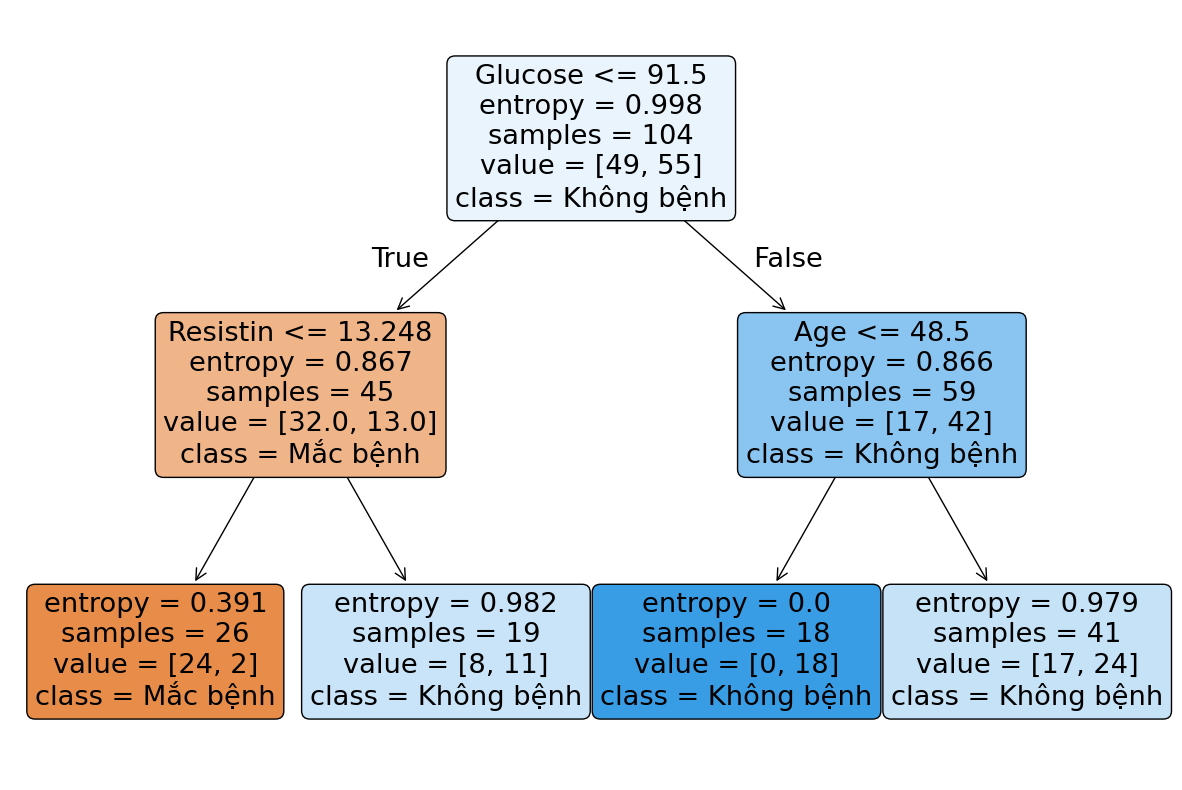

In [330]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
a = plot_tree(
    my_tree,
    feature_names=df.columns,
    class_names=['Mắc bệnh', 'Không bệnh'],
    filled=True,
    rounded=True
)
plt.show()